In [1]:
#conda remove py-xgboost

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [40]:
load_boston = datasets.load_boston()

In [41]:
df = pd.DataFrame(load_boston.data, columns=load_boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [42]:
# add target
df['price'] = load_boston['target']

In [43]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [44]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

# Do Data-Analysis 
#### find the correlation b/n variouse features(labels)  ------ ( -ve,  +ve or weak correlation ) meaning one col affects another

In [45]:
correlation = df.corr()

<AxesSubplot:>

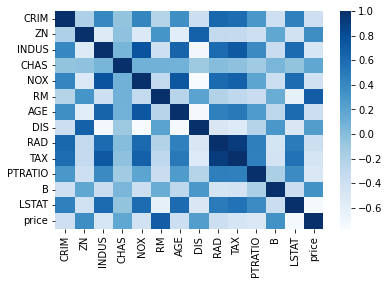

In [46]:
sns.heatmap(correlation, cmap='Blues', linecolor='white')

# split, trian, test, 

In [47]:
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
# model
knnModel = KNeighborsClassifier() 

In [48]:
# knnModel.fit(X_train, y_train)
# xtrainPred = knnModel.predict(X_train)
# xtrainAcc = accuracy_score(y_train, xtrainPred)
# print(X_train)

In [ ]:
# from sklearn import preprocessing
# ValueError: Unknown label type: 'continuous' the above will solve the problem

# lab_enc = preprocessing.LabelEncoder()
# y_train_encoded = lab_enc.fit_transform(y_train)
# print(y_train_encoded)

# knnModel.fit(X_train, y_train_encoded)
# xtrainPred = knnModel.predict(X_train)
# xtrainAcc = accuracy_score(y_train_encoded, xtrainPred)
# print(xtrainAcc)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# #
# # Instantiate LabelEncoder
# #
# le = LabelEncoder()
# #
# # Encode single column status
# #
# df.status = le.fit_transform(df.status)
# #
# # Print df.head for checking the transformation
# #
# df.head

# Pracitcing StandardScaler, LabelEncoder

In [35]:
import pandas as pd

data = {'Sex':  ['Female', 'Male', 'Male', 'Trans', 'Trans'],
        'Price': [3, 12, 423334, 693.20, 0.45], 
        'Color': ['Balck', 'Black', 'White', 'Green', 'Blue']
        }

newDF = pd.DataFrame (data, columns = ['Sex','Price', 'Color'])

newDF

,Sex,Price,Color
0,Female,3.00,Balck
1,Male,12.00,Black
2,Male,423334.00,White
3,Trans,693.20,Green
4,Trans,0.45,Blue


In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

newDF['Sex'] = le.fit_transform(newDF['Sex'])
newDF

,Sex,Price,Color
0,0,3.00,Balck
1,1,12.00,Black
2,1,423334.00,White
3,2,693.20,Green
4,2,0.45,Blue


In [37]:
cols = ['Sex', 'Color']
newDF[cols] = newDF[cols].apply(le.fit_transform)
newDF

,Sex,Price,Color
0,0,3.00,0
1,1,12.00,1
2,1,423334.00,4
3,2,693.20,3
4,2,0.45,2


In [38]:
from sklearn.preprocessing import StandardScaler

colsToscale = ['Price']
scaler = StandardScaler()
newDF[colsToscale] = scaler.fit_transform(newDF[colsToscale])
newDF

,Sex,Price,Color
0,0,-0.501028,0
1,1,-0.500975,1
2,1,1.999998,4
3,2,-0.496951,3
4,2,-0.501043,2
